### networkx 모듈
- 데이터 간의 상관관계나 연결성 등 분석
- 사이트: https://networkx.org/
- 코  드: https://github.com/networkx/networkx

In [ ]:
#!pip install networkx
#!pip install apyori  
# apyori 참조 : https://github.com/ymoch/apyori 

#### networkx 기본

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
graph=nx.Graph()

graph.add_nodes_from((1,2,3,4,5))
graph.add_edges_from([(1,2),(1,3),(1,4),(3,5),(4,3)])
nx.draw(graph, with_labels=True)
plt.show()

In [ ]:
df=pd.DataFrame({'from':["A", "B", "C", "A", "D", "E"],
                 'to':['D', "A", "E", "F","B", "E"],
                 'weight':[1,2,3,4,5,6]})
print(df)

gra=nx.from_pandas_edgelist(df, "from", "to", create_using=nx.DiGraph)
nx.draw(gra, with_labels=True)
plt.show()

### 전국 공원 리뷰를 이용한 네트워크 분석

In [2]:
f=open("c:/pydata/korpark10.txt", "r", encoding="utf-8")
txt_data=f.readlines()
f.close()
txt_data[:5]

['.세상에서 가장 크고 오래된 나무들이 사는곳 자유의 여신상보다 크고 2500년된 나무도 있고욬ㅋㅋㅋ크기가 어마어마한데 사진으로는 다 담기지도 않는것 😱강아지들이랑 가기도 좋은 국립공원중 하나에요☺️ .(다만 펫이 안되는곳도 있으니 미리 참고)단점은 사람이 너무 많음 🤣 . .#sequoianationalpark #🌲 #🐾\n',
 '\n',
 '.#일출 #빛 에 물든 #국립공원 연안 경비정...#벤로코리아#benrokorea#소매물도#여행#여행에미치다#바다#하늘 #풍경#풍경사진#야경#등산#백패킹#소니#소니이미지갤러리#스냅#스냅사진#감성#감성사진#a7r3#sonyimages#ig_asia#ig_korea#longexposures#nightview#sonyalpha#ig_color\n',
 '\n',
 'Mt. Bukhansan National Park아름다운 우리강산 - MangyongdaeBeautiful Korea#북한산. #만경대. #일출. #하늘빛. #가을아침. #국립공원. #산스타그램. #Photography. #NationalPark.#Travel. #nature. #mountainView. #sunsetSky. #SunriseSky. #nightscape. #seoul. #KoreanLandscape. #OlympusEM1. #PhotoStargram.\n']

### 정규식 표현
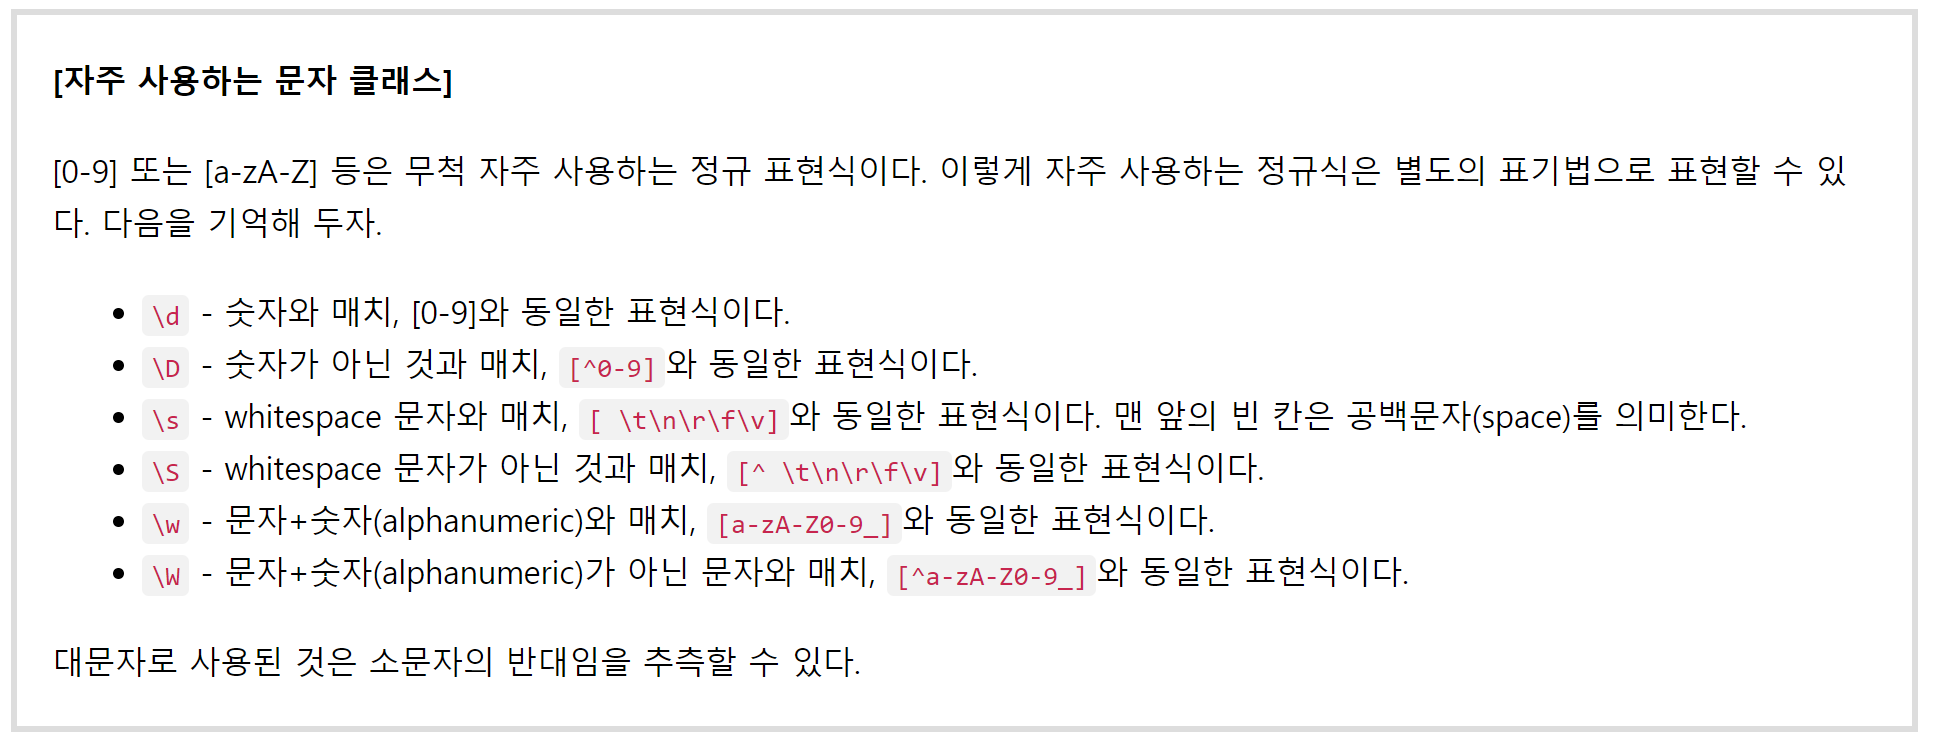

In [3]:
from konlpy.tag import Okt
import re
from tqdm import tqdm

okt=Okt()

# 단어 2차원 리스트
dataset=[]
for txt in tqdm(txt_data):
    nons=okt.nouns(re.sub('[^가-힣a-zA-Z ]', '', txt))
    if len(nons) >=1:
        dataset.append(nons)
print(dataset[:5])

100%|█████████████████████████████████████████████████████████████████████████████| 1966/1966 [00:08<00:00, 221.26it/s]

[['세상', '가장', '나무', '곳', '자유', '여신', '년', '나무', '욬', '크기', '사진', '강아지', '가기', '국립공원', '하나', '다만', '펫', '곳도', '미리', '참고', '단점', '사람'], ['일출', '빛', '물든', '국립공원', '연안', '경비정', '벤로', '코리아', '소매물도', '여행', '여행', '바다', '하늘', '풍경', '풍경사진', '등산', '패킹', '소니', '소니', '이미지', '갤러리', '스냅', '스냅', '사진', '감성', '감성', '사진'], ['우리', '강산', '북한', '산', '만경대', '일출', '하늘빛', '가을', '아침', '국립공원', '산', '스타', '그램'], ['인증'], ['사진', '뭘', '찌', '길잡이', '사진', '운전', '승엽', '어린이', '용렬', '동상', '고생', '음', '또', '출동', '쟈', '속초', '설악산', '국립공원', '토', '폭포', '별', '소년', '길릿', '지산', '행', '릉산행', '오지', '산행토', '왕골', '토폭', '상단', '칠성', '봉', '등산', '스타', '그램', '산', '스타', '그램', '마운트', '립', '하이킹']]


In [4]:
from apyori import apriori

In [5]:
support_res=(list(apriori(dataset, min_support=0.06)))
#type(support_res)

df1=pd.DataFrame(support_res)
df1

,items,support,ordered_statistics
0,(계곡),0.082550,"[((), (계곡), 0.08254963427377221, 1.0)]"
1,(곳),0.080460,"[((), (곳), 0.08045977011494253, 1.0)]"
2,(국립공원),0.830721,"[((), (국립공원), 0.8307210031347962, 1.0)]"
3,(그램),0.211076,"[((), (그램), 0.2110762800417973, 1.0)]"
4,(등산),0.113898,"[((), (등산), 0.11389759665621735, 1.0)]"
...,...,...,...
73,"(그램, 스타, 산)",0.080460,"[((), (그램, 스타, 산), 0.08045977011494253, 1.0), ..."
74,"(그램, 스타, 여행)",0.099269,"[((), (그램, 스타, 여행), 0.09926854754440961, 1.0),..."
75,"(국립공원, 그램, 스타, 등산)",0.072100,"[((), (국립공원, 그램, 스타, 등산), 0.07210031347962383,..."
76,"(국립공원, 그램, 스타, 산)",0.080460,"[((), (국립공원, 그램, 스타, 산), 0.08045977011494253, ..."


In [6]:
df1['length']=df1['items'].apply(lambda x: len(x))
df1

,items,support,ordered_statistics,length
0,(계곡),0.082550,"[((), (계곡), 0.08254963427377221, 1.0)]",1
1,(곳),0.080460,"[((), (곳), 0.08045977011494253, 1.0)]",1
2,(국립공원),0.830721,"[((), (국립공원), 0.8307210031347962, 1.0)]",1
3,(그램),0.211076,"[((), (그램), 0.2110762800417973, 1.0)]",1
4,(등산),0.113898,"[((), (등산), 0.11389759665621735, 1.0)]",1
...,...,...,...,...
73,"(그램, 스타, 산)",0.080460,"[((), (그램, 스타, 산), 0.08045977011494253, 1.0), ...",3
74,"(그램, 스타, 여행)",0.099269,"[((), (그램, 스타, 여행), 0.09926854754440961, 1.0),...",3
75,"(국립공원, 그램, 스타, 등산)",0.072100,"[((), (국립공원, 그램, 스타, 등산), 0.07210031347962383,...",4
76,"(국립공원, 그램, 스타, 산)",0.080460,"[((), (국립공원, 그램, 스타, 산), 0.08045977011494253, ...",4


In [7]:
df=df1[(df1['length']==2) & (df1['support']>=0.07)].sort_values(by="support", ascending=False)
df

,items,support,ordered_statistics,length
39,"(국립공원, 여행)",0.336468,"[((), (국립공원, 여행), 0.33646812957157785, 1.0), (...",2
28,"(국립공원, 그램)",0.211076,"[((), (국립공원, 그램), 0.2110762800417973, 1.0), ((...",2
37,"(국립공원, 스타)",0.202717,"[((), (국립공원, 스타), 0.2027168234064786, 1.0), ((...",2
49,"(그램, 스타)",0.197492,"[((), (그램, 스타), 0.1974921630094044, 1.0), ((그램...",2
34,"(국립공원, 산)",0.169279,"[((), (국립공원, 산), 0.16927899686520376, 1.0), ((...",2
29,"(국립공원, 등산)",0.110763,"[((), (국립공원, 등산), 0.11076280041797283, 1.0), (...",2
50,"(그램, 여행)",0.105538,"[((), (그램, 여행), 0.10553814002089865, 1.0), ((그...",2
57,"(스타, 여행)",0.103448,"[((), (스타, 여행), 0.10344827586206896, 1.0), ((스...",2
33,"(국립공원, 사진)",0.102403,"[((), (국립공원, 사진), 0.10240334378265413, 1.0), (...",2
46,"(국립공원, 휴가)",0.101358,"[((), (국립공원, 휴가), 0.1013584117032393, 1.0), ((...",2


In [8]:
# gra=nx.Graph()
gra=nx.Graph()
arp=(df['items'])   # 로드
gra.add_edges_from(arp) # 엣지
arp

39     (국립공원, 여행)
28     (국립공원, 그램)
37     (국립공원, 스타)
49       (그램, 스타)
34      (국립공원, 산)
29     (국립공원, 등산)
50       (그램, 여행)
57       (스타, 여행)
33     (국립공원, 사진)
46     (국립공원, 휴가)
38     (국립공원, 여름)
42     (국립공원, 캠핑)
43     (국립공원, 탐방)
44     (국립공원, 풍경)
31     (국립공원, 사람)
48        (그램, 산)
55        (산, 스타)
26     (국립공원, 계곡)
35    (국립공원, 설악산)
30     (국립공원, 미국)
40     (국립공원, 일상)
41     (국립공원, 자연)
47       (그램, 등산)
36      (국립공원, 수)
27      (국립공원, 곳)
52       (스타, 등산)
51        (산, 등산)
Name: items, dtype: object

In [9]:
import numpy as np

prk=nx.pagerank(gra)
nsize=np.array([val for val in prk.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))
nsize

array([2000.        ,  159.78867288,  328.13298973,  328.13298973,
        241.17844908,  241.17844908,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

In [25]:
# 
pos=nx.circular_layout(gra)
pos

{'국립공원': array([9.99999981e-01, 1.92722997e-08]),
 '여행': array([0.95105652, 0.30901702]),
 '그램': array([0.80901699, 0.58778525]),
 '스타': array([0.58778523, 0.80901701]),
 '산': array([0.30901697, 0.95105654]),
 '등산': array([-4.36121782e-08,  1.00000000e+00]),
 '사진': array([-0.30901703,  0.95105648]),
 '휴가': array([-0.58778517,  0.80901701]),
 '여름': array([-0.80901705,  0.58778519]),
 '캠핑': array([-0.95105646,  0.30901705]),
 '탐방': array([-9.99999981e-01, -6.81504752e-08]),
 '풍경': array([-0.95105652, -0.30901695]),
 '사람': array([-0.80901693, -0.58778533]),
 '계곡': array([-0.58778505, -0.80901709]),
 '설악산': array([-0.30901709, -0.95105644]),
 '미국': array([ 1.20240897e-08, -9.99999961e-01]),
 '일상': array([ 0.30901712, -0.95105644]),
 '자연': array([ 0.58778505, -0.80901709]),
 '수': array([ 0.80901693, -0.58778527]),
 '곳': array([ 0.95105652, -0.30901692])}

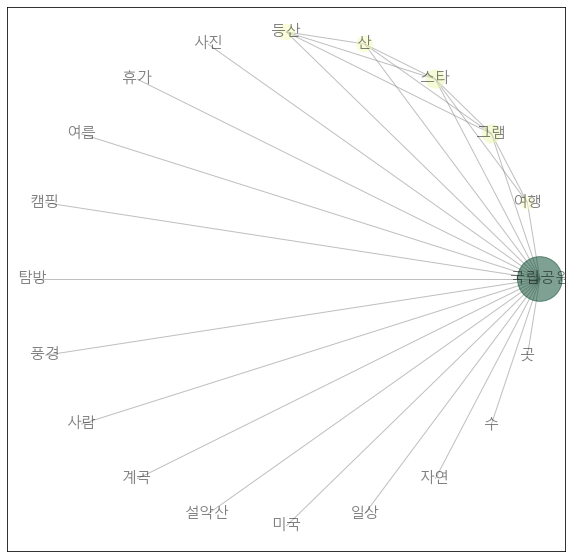

In [28]:
# 한글폰트 설정
from matplotlib import font_manager
font_family = font_manager.FontProperties(fname='C:/Windows/Fonts/malgunsl.ttf').get_name()

plt.figure(figsize=(10, 10))
           
nx.draw_networkx(gra, pos=pos, node_color=list(prk.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.5', cmap=plt.cm.YlGn,
                 font_family=font_family,font_size=15)
plt.draw()